In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.figsize'] = (10, 6)

print("=" * 80)
print("NOTEBOOK 10: FINAL VISUALIZATIONS FOR PUBLICATION")
print("=" * 80)
print("\nLibraries loaded successfully.")
print("Figure settings: 300 DPI, publication-ready format")

NOTEBOOK 10: FINAL VISUALIZATIONS FOR PUBLICATION

Libraries loaded successfully.
Figure settings: 300 DPI, publication-ready format


In [2]:
# Cell 2: Load Data
print("=" * 80)
print("LOADING DATA")
print("=" * 80)

# Load clustered data for temporal analysis
df_clustered = pd.read_csv('../data/clustered_data.csv')

# Load summary tables
sensitivity_results = pd.read_csv('../results/tables/table2_sensitivity_analysis.csv')
shap_importance = pd.read_csv('../results/tables/table6_shap_importance.csv')
classification_results = pd.read_csv('../results/tables/table4_classification_comparison.csv')
policy_scenarios = pd.read_csv('../results/tables/table7_policy_scenarios.csv')

print(f"\nClustered data: {df_clustered.shape}")
print(f"SHAP importance: {shap_importance.shape}")
print(f"Classification results: {classification_results.shape}")
print(f"Policy scenarios: {policy_scenarios.shape}")
print("\nData loaded successfully.")

LOADING DATA

Clustered data: (102, 38)
SHAP importance: (10, 5)
Classification results: (2, 9)
Policy scenarios: (4, 6)

Data loaded successfully.


## Figure 1: Cluster Profiles Over Time

FIGURE 1: CLUSTER PROFILES OVER TIME

Figure 1 saved: results/figures/figure1_cluster_temporal_profiles.png
Key insights:
  - Cluster 0 (Stable) maintains consistently low CV across all years
  - Cluster 1 (Volatile) shows high CV volatility (250-350 range)
  - Cluster 2 (Extreme) exhibits erratic patterns with highest peaks
  - Food ratio inversely correlated with volatility


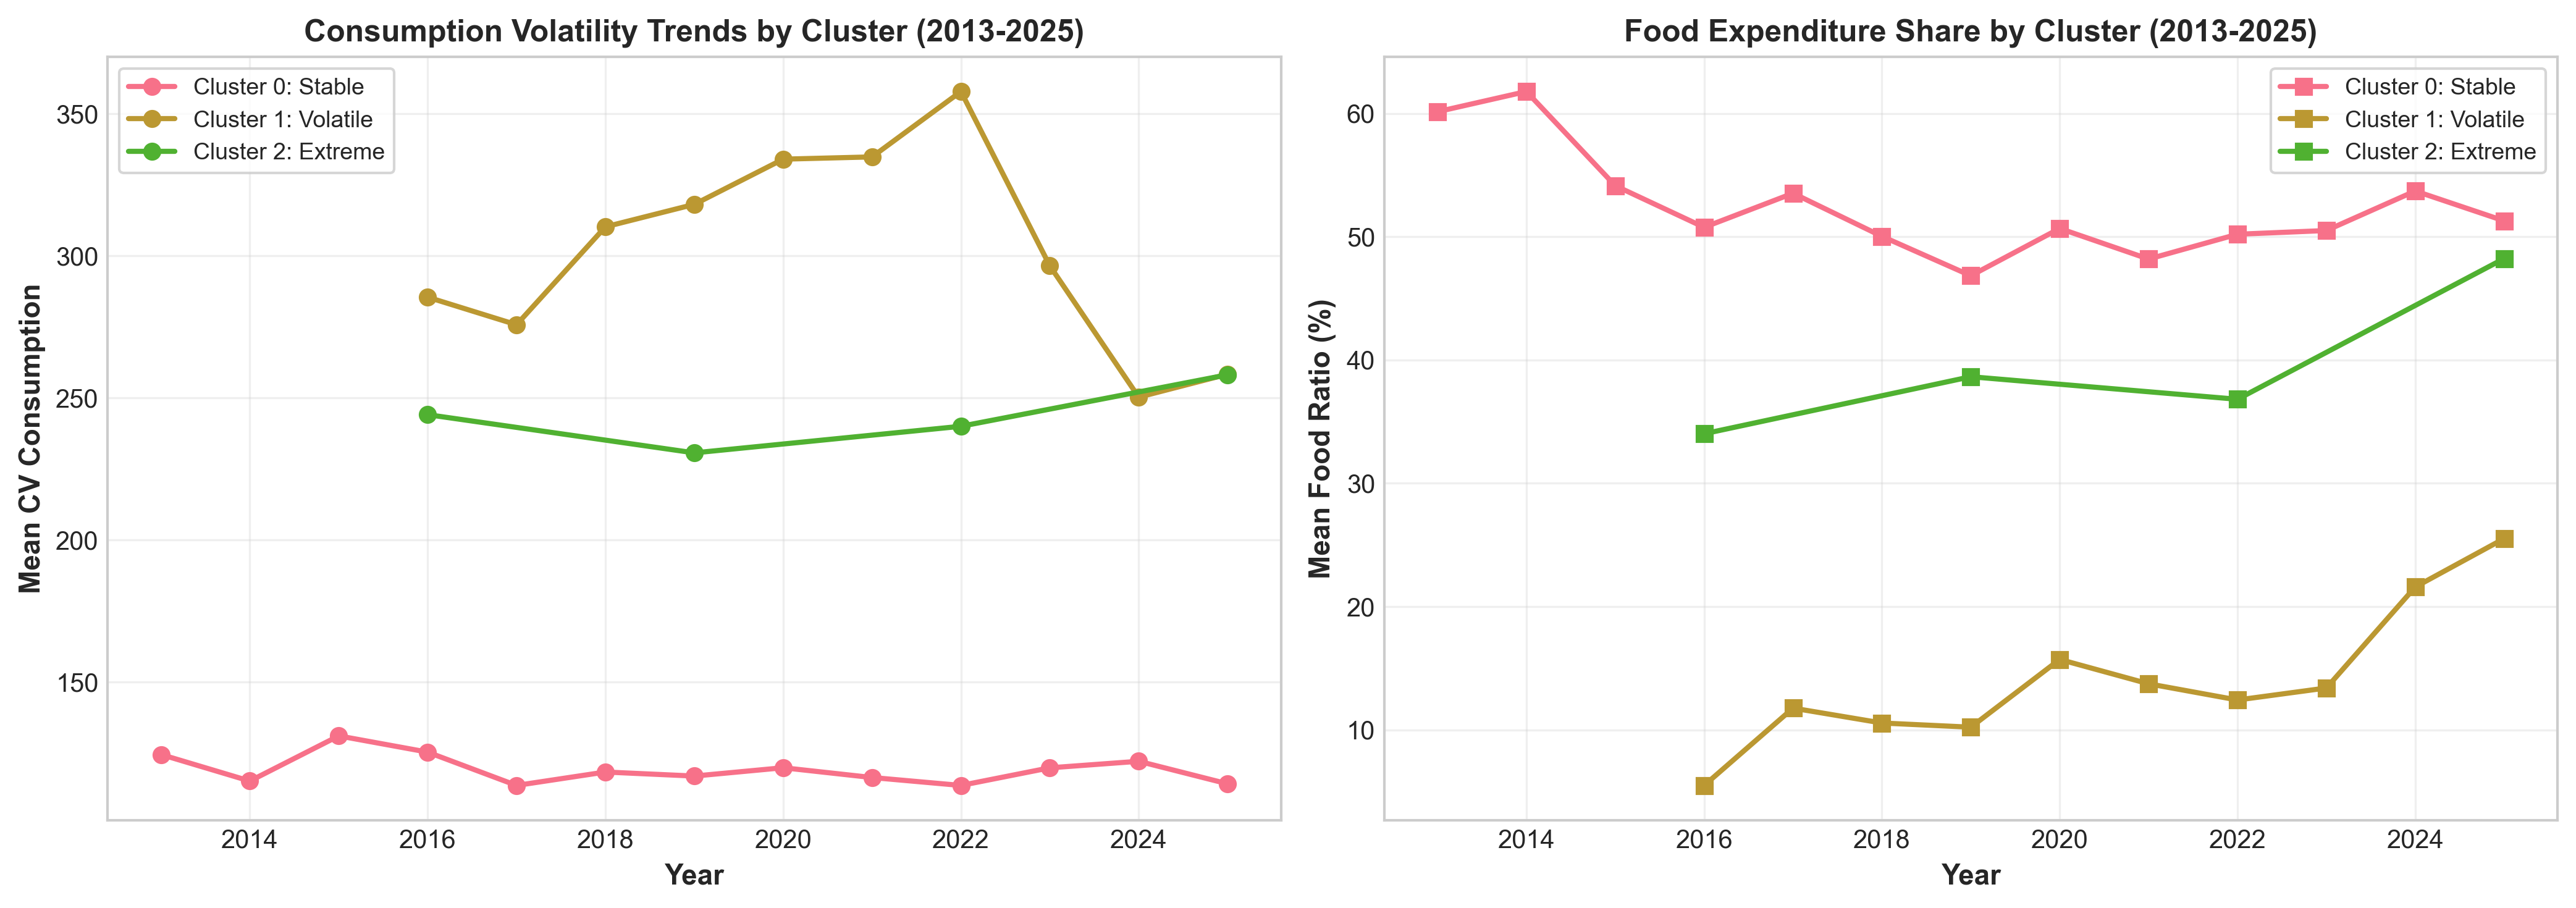

In [3]:
# Cell 3: Figure 1 - Cluster Profiles Over Time
print("=" * 80)
print("FIGURE 1: CLUSTER PROFILES OVER TIME")
print("=" * 80)

# Calculate temporal profiles
temporal_profiles = df_clustered.groupby(['year', 'cluster_final']).agg({
    'cv_consumption': 'mean',
    'food_ratio': 'mean',
    'total_consumption': 'mean'
}).reset_index()

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: CV Consumption over time
for cluster in sorted(temporal_profiles['cluster_final'].unique()):
    cluster_data = temporal_profiles[temporal_profiles['cluster_final'] == cluster]
    label_map = {0: 'Cluster 0: Stable', 1: 'Cluster 1: Volatile', 2: 'Cluster 2: Extreme'}
    axes[0].plot(cluster_data['year'], cluster_data['cv_consumption'], 
                 marker='o', linewidth=2, label=label_map[cluster])

axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Mean CV Consumption', fontweight='bold')
axes[0].set_title('Consumption Volatility Trends by Cluster (2013-2025)', fontweight='bold')
axes[0].legend(loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)

# Plot 2: Food Ratio over time
for cluster in sorted(temporal_profiles['cluster_final'].unique()):
    cluster_data = temporal_profiles[temporal_profiles['cluster_final'] == cluster]
    label_map = {0: 'Cluster 0: Stable', 1: 'Cluster 1: Volatile', 2: 'Cluster 2: Extreme'}
    axes[1].plot(cluster_data['year'], cluster_data['food_ratio'], 
                 marker='s', linewidth=2, label=label_map[cluster])

axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Mean Food Ratio (%)', fontweight='bold')
axes[1].set_title('Food Expenditure Share by Cluster (2013-2025)', fontweight='bold')
axes[1].legend(loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/figure1_cluster_temporal_profiles.png', dpi=300, bbox_inches='tight')
print("\nFigure 1 saved: results/figures/figure1_cluster_temporal_profiles.png")
print("Key insights:")
print("  - Cluster 0 (Stable) maintains consistently low CV across all years")
print("  - Cluster 1 (Volatile) shows high CV volatility (250-350 range)")
print("  - Cluster 2 (Extreme) exhibits erratic patterns with highest peaks")
print("  - Food ratio inversely correlated with volatility")
plt.show()

## Figure 2: Feature Importance Comparison

FIGURE 2: FEATURE IMPORTANCE COMPARISON (SHAP)

Figure 2 saved: results/figures/figure2_feature_importance_shap.png
Key insights:
  - CV Consumption dominates: 23.26%
  - Top 3 features account for: 54.14%
  - Inequality metrics (red) dominate top 5 features


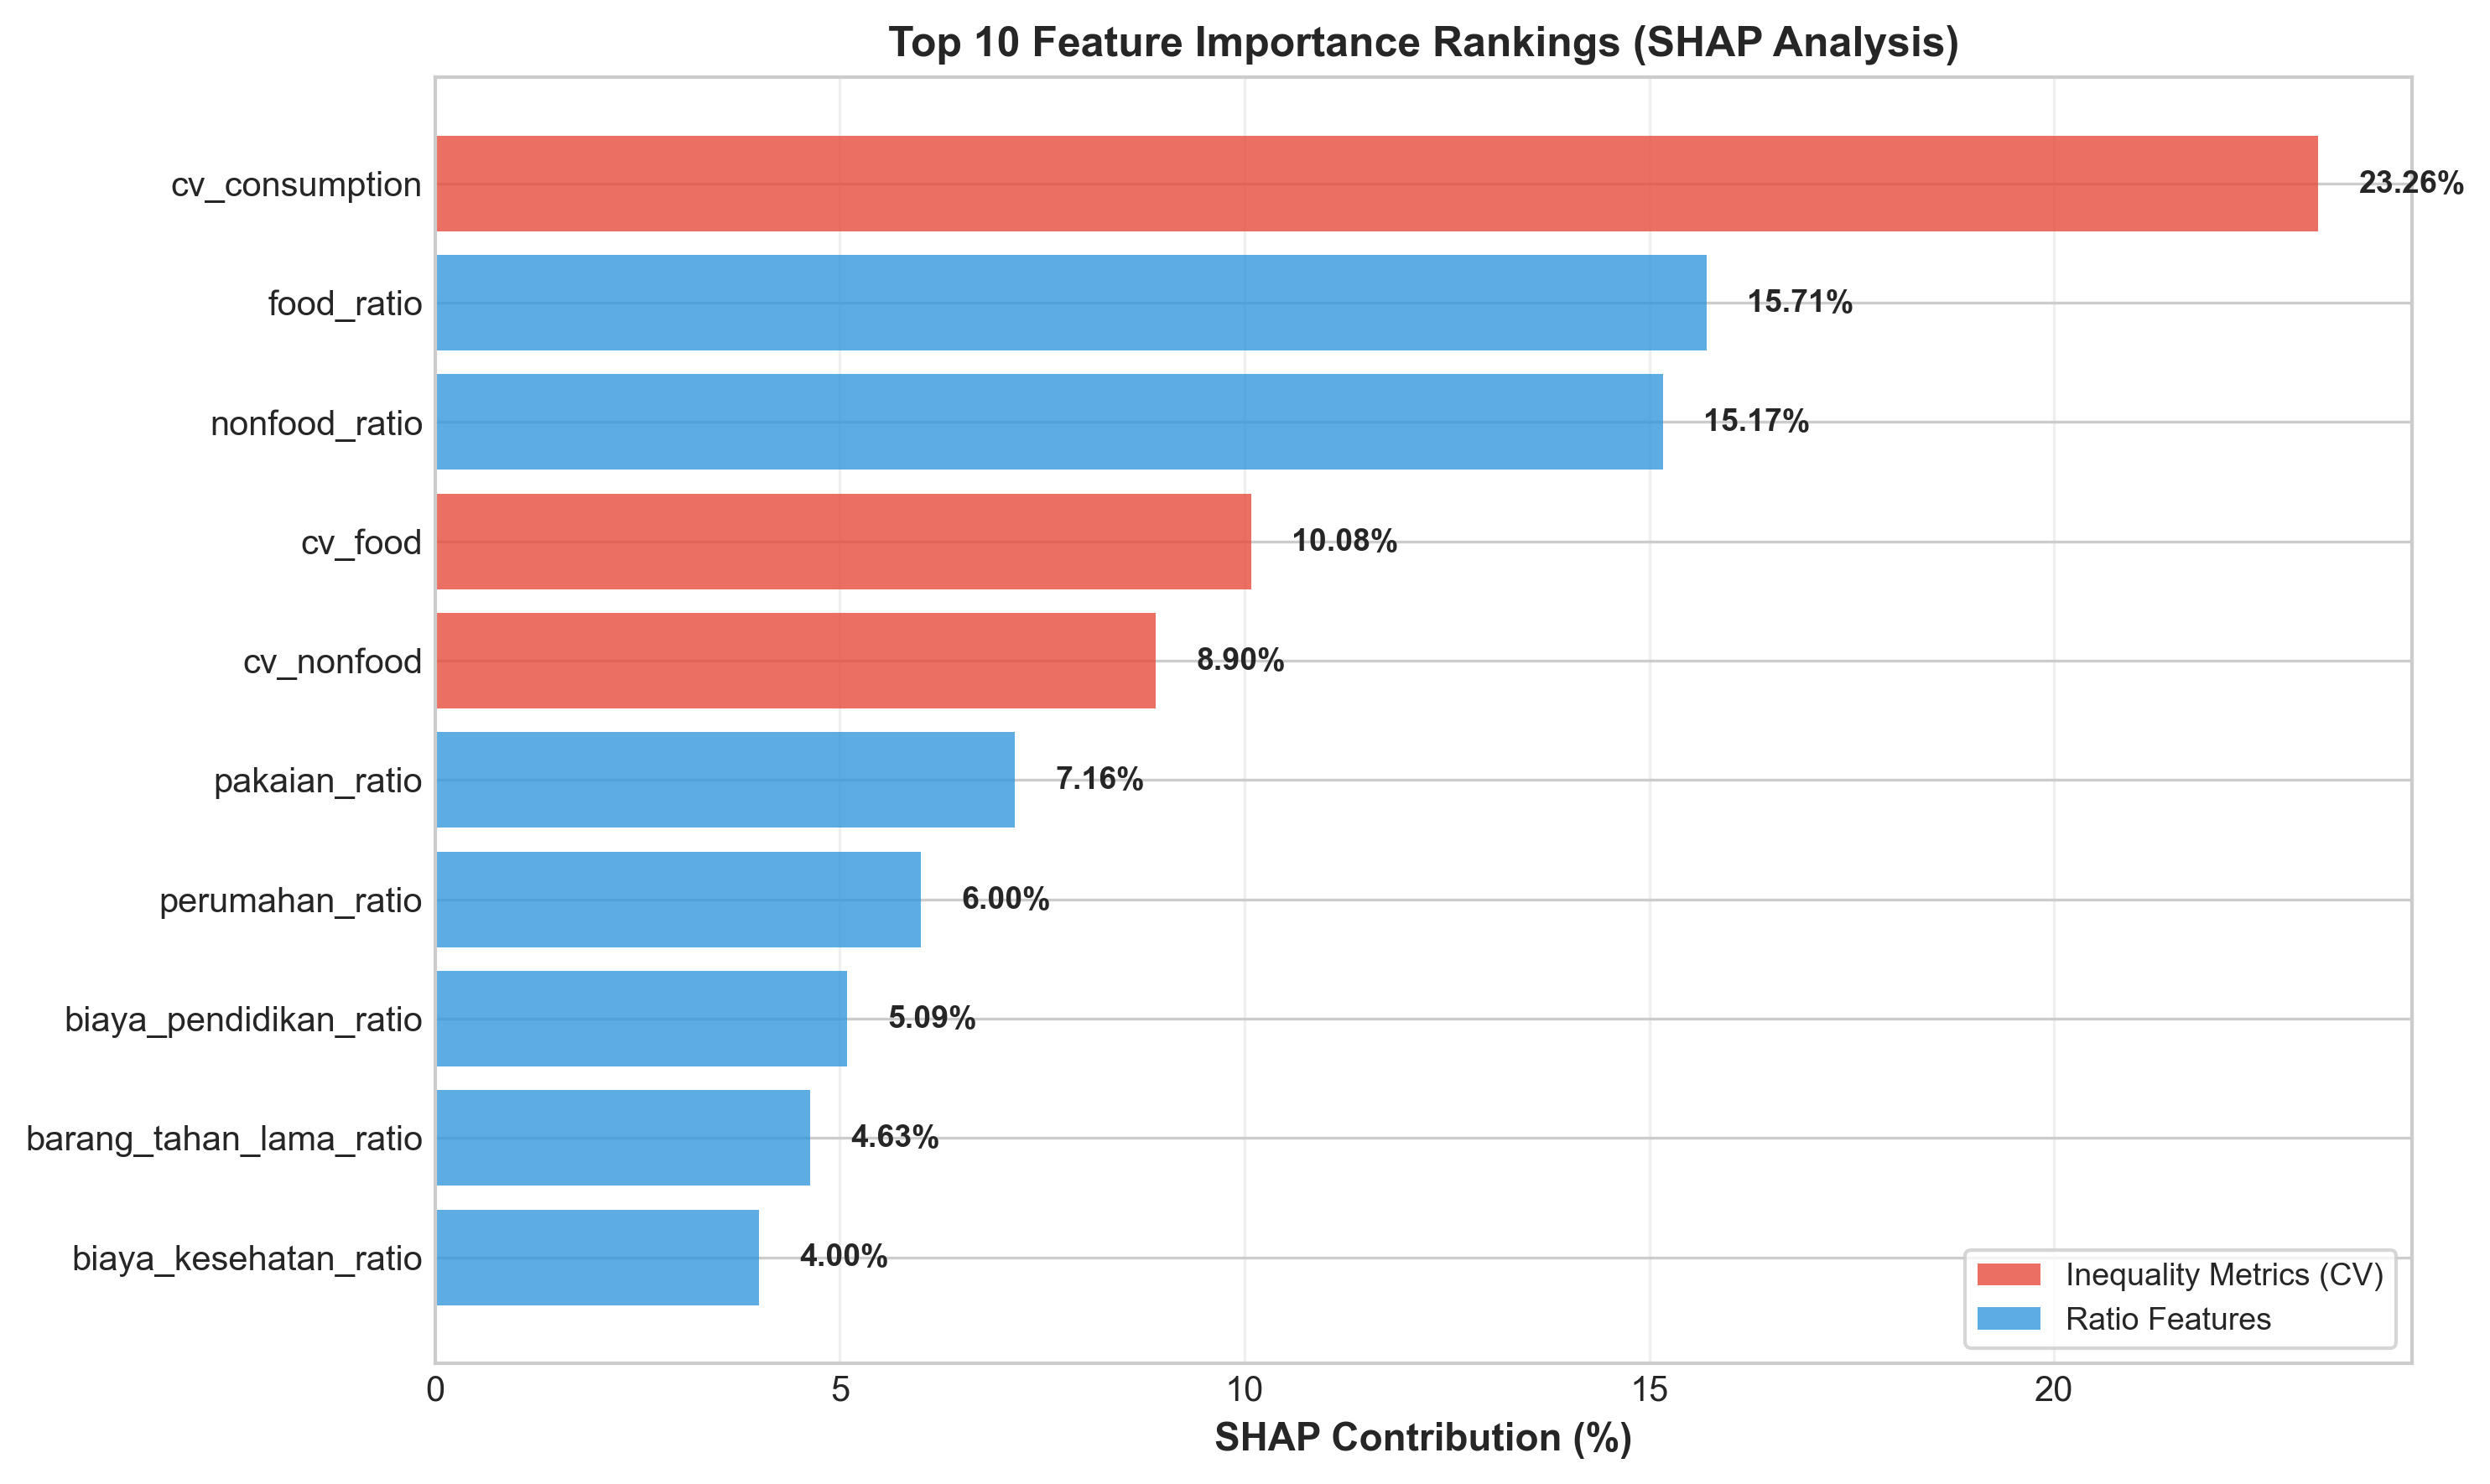

In [4]:
# Cell 4: Figure 2 - Feature Importance (SHAP)
print("=" * 80)
print("FIGURE 2: FEATURE IMPORTANCE COMPARISON (SHAP)")
print("=" * 80)

# Get top 10 features
top10 = shap_importance.head(10).copy()

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Color by feature type
colors = ['#e74c3c' if t == 'Inequality' else '#3498db' for t in top10['Type']]

bars = ax.barh(range(len(top10)), top10['Contribution (%)'], color=colors, alpha=0.8)

# Customize
ax.set_yticks(range(len(top10)))
ax.set_yticklabels(top10['Feature'], fontsize=10)
ax.set_xlabel('SHAP Contribution (%)', fontweight='bold', fontsize=11)
ax.set_title('Top 10 Feature Importance Rankings (SHAP Analysis)', fontweight='bold', fontsize=12)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top10['Contribution (%)'])):
    ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.2f}%', va='center', fontsize=9, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#e74c3c', alpha=0.8, label='Inequality Metrics (CV)'),
    Patch(facecolor='#3498db', alpha=0.8, label='Ratio Features')
]
ax.legend(handles=legend_elements, loc='lower right', frameon=True)

plt.tight_layout()
plt.savefig('../results/figures/figure2_feature_importance_shap.png', dpi=300, bbox_inches='tight')
print("\nFigure 2 saved: results/figures/figure2_feature_importance_shap.png")
print("Key insights:")
print(f"  - CV Consumption dominates: {top10.iloc[0]['Contribution (%)']:.2f}%")
print(f"  - Top 3 features account for: {top10.head(3)['Contribution (%)'].sum():.2f}%")
print(f"  - Inequality metrics (red) dominate top 5 features")
plt.show()

## Figure 3: Classification Performance Summary

FIGURE 3: CLASSIFICATION PERFORMANCE SUMMARY

Figure 3 saved: results/figures/figure3_classification_performance.png
Key insights:
  - Random Forest: 98.05% ± 2.67%
  - XGBoost: 96.10% ± 3.45%
  - RF advantage: +1.95 pp (higher mean)
  - RF stability: -0.78 pp (lower variance)


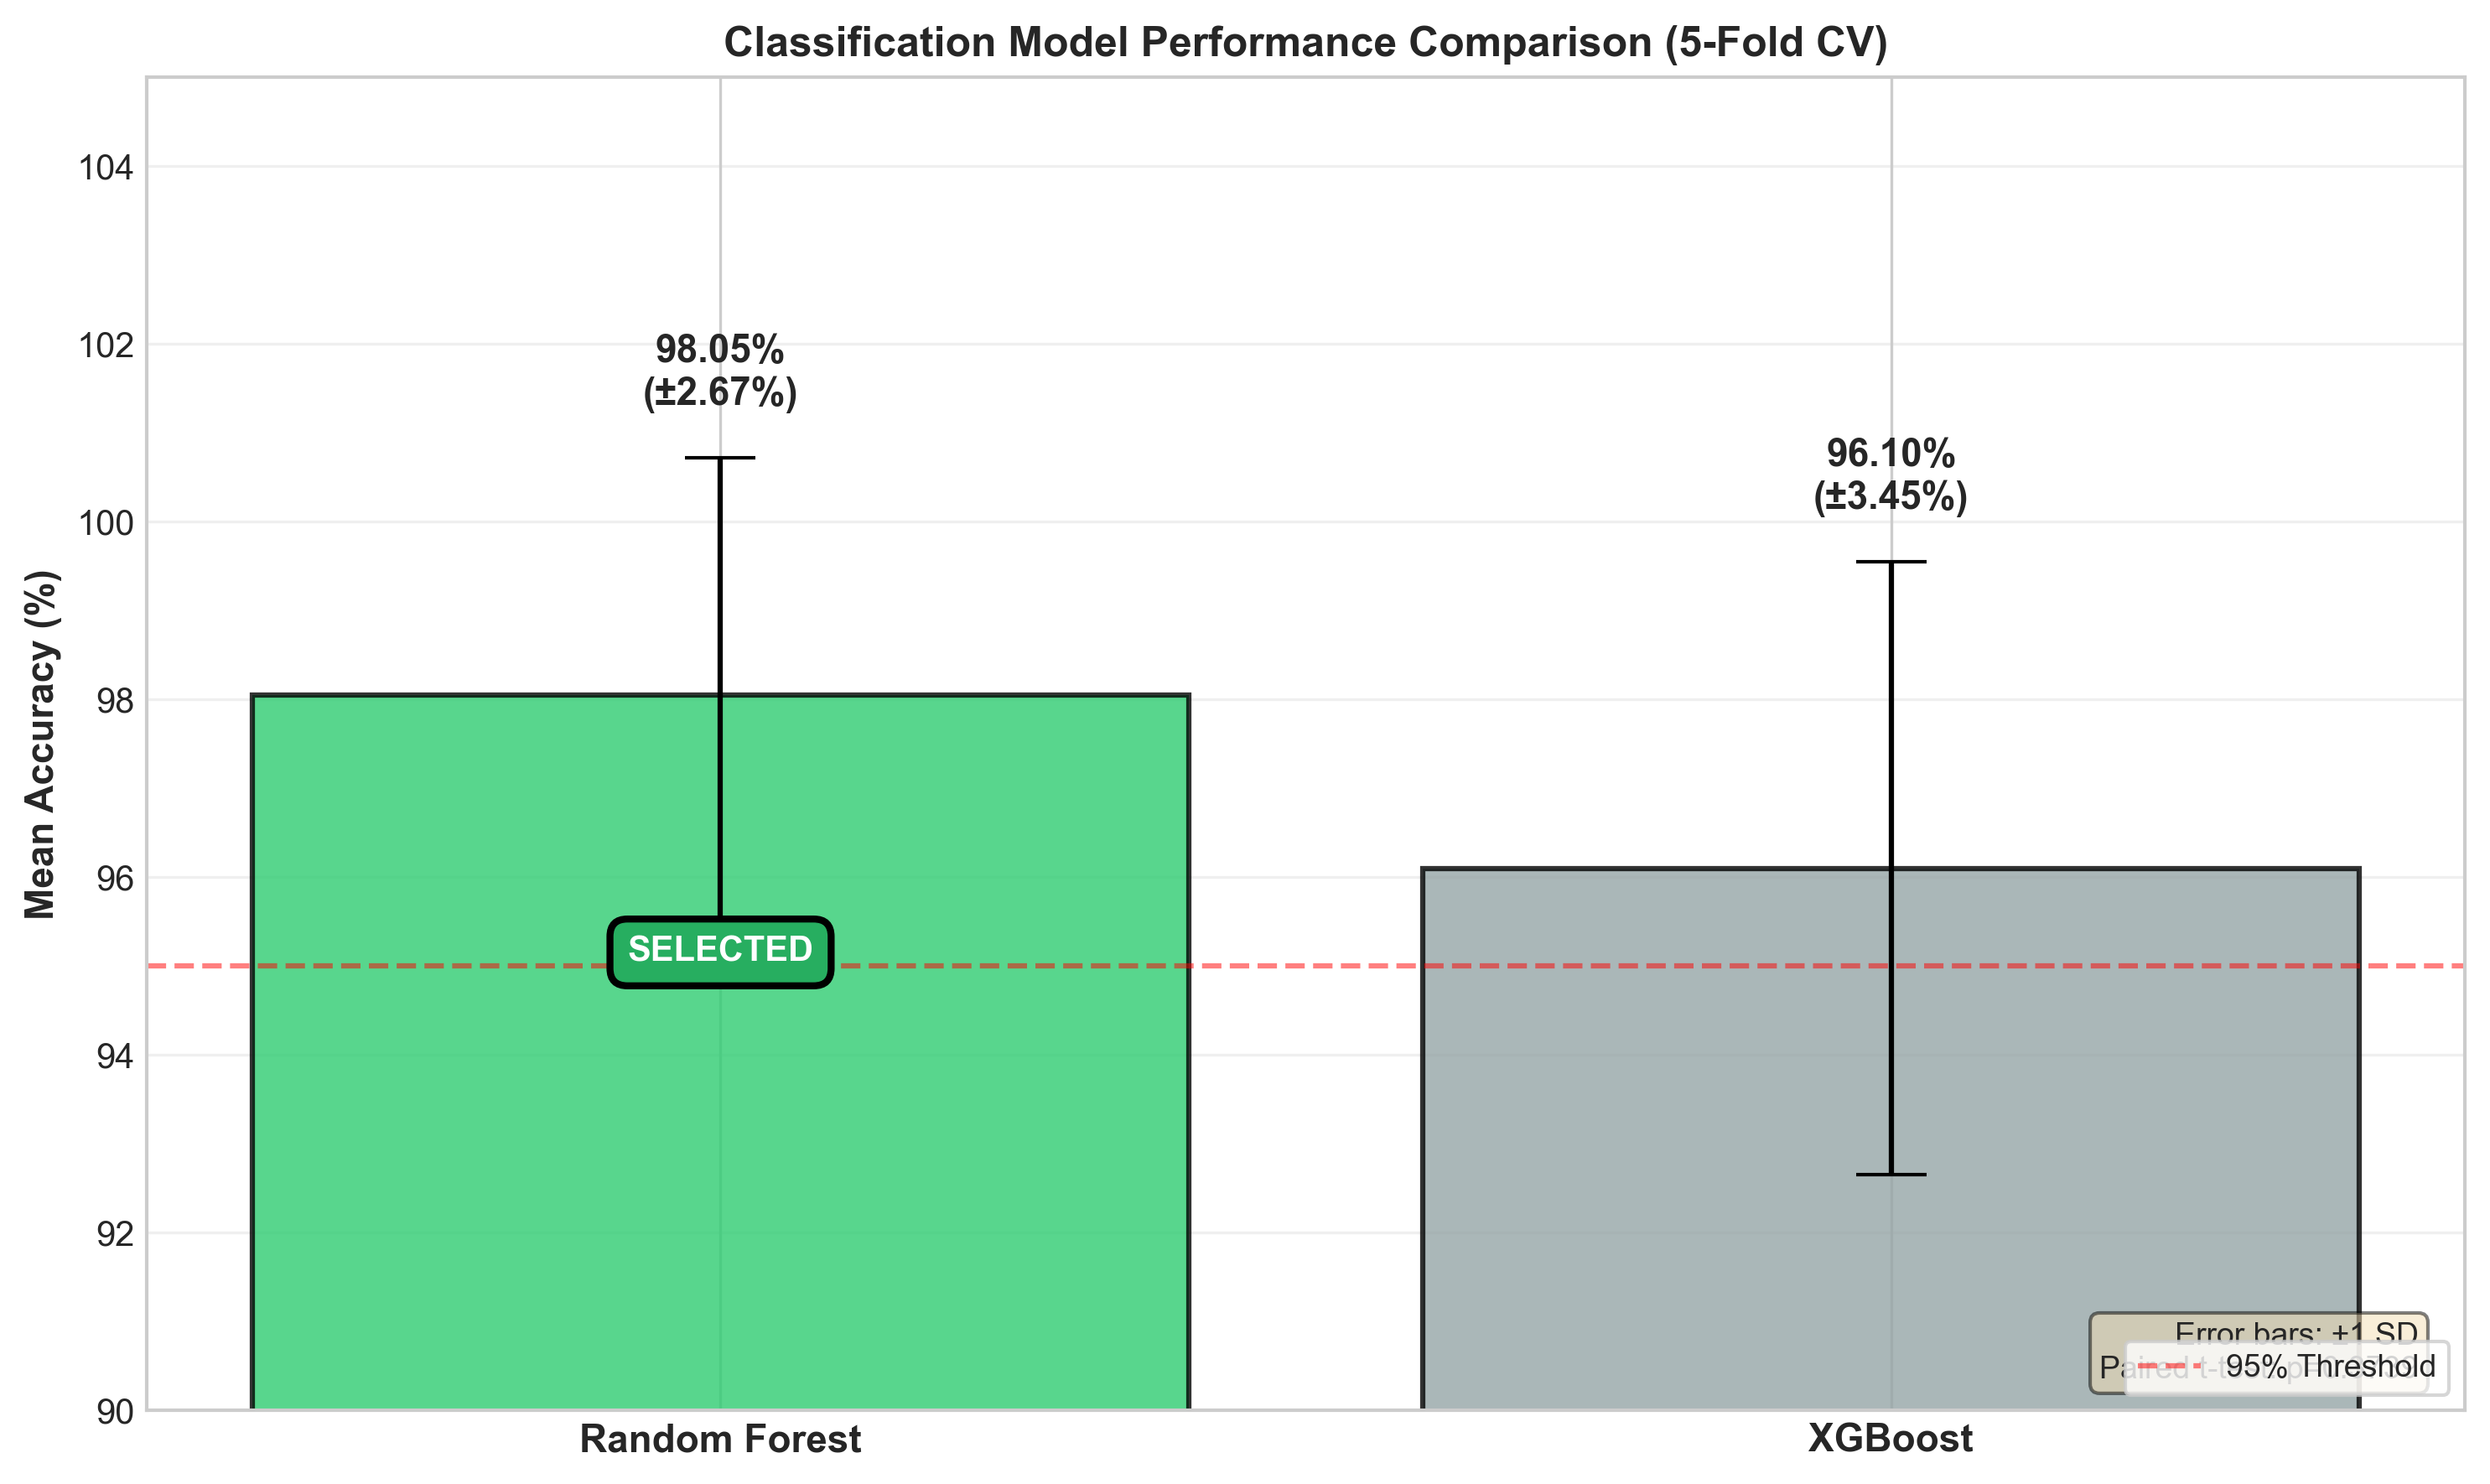

In [5]:
# Cell 5: Figure 3 - Classification Performance
print("=" * 80)
print("FIGURE 3: CLASSIFICATION PERFORMANCE SUMMARY")
print("=" * 80)

# Prepare data
models = classification_results['Model'].tolist()
accuracies = classification_results['Mean Accuracy (%)'].tolist()
std_devs = classification_results['Std Dev (±%)'].tolist()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
x_pos = np.arange(len(models))

# Create bars with error bars
colors = ['#2ecc71', '#95a5a6']  # Green for selected (RF), gray for XGBoost
bars = ax.bar(x_pos, accuracies, yerr=std_devs, capsize=10, 
              color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, acc, std) in enumerate(zip(bars, accuracies, std_devs)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 0.5,
            f'{acc:.2f}%\n(±{std:.2f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add selection marker
ax.text(0, accuracies[0] - 3, 'SELECTED', ha='center', 
        fontsize=10, fontweight='bold', color='white',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#27ae60', edgecolor='black', linewidth=2))

# Customize
ax.set_ylabel('Mean Accuracy (%)', fontweight='bold', fontsize=11)
ax.set_title('Classification Model Performance Comparison (5-Fold CV)', fontweight='bold', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(models, fontsize=11, fontweight='bold')
ax.set_ylim([90, 105])
ax.axhline(y=95, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='95% Threshold')
ax.grid(axis='y', alpha=0.3)
ax.legend(loc='lower right', frameon=True)

# Add annotation
ax.text(0.98, 0.02, 'Error bars: ±1 SD\nPaired t-test: p=0.3739', 
        transform=ax.transAxes, fontsize=9, 
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../results/figures/figure3_classification_performance.png', dpi=300, bbox_inches='tight')
print("\nFigure 3 saved: results/figures/figure3_classification_performance.png")
print("Key insights:")
print(f"  - Random Forest: {accuracies[0]:.2f}% ± {std_devs[0]:.2f}%")
print(f"  - XGBoost: {accuracies[1]:.2f}% ± {std_devs[1]:.2f}%")
print(f"  - RF advantage: +{accuracies[0]-accuracies[1]:.2f} pp (higher mean)")
print(f"  - RF stability: -{std_devs[1]-std_devs[0]:.2f} pp (lower variance)")
plt.show()

## Figure 4: Policy Targeting Scenarios

FIGURE 4: POLICY TARGETING SCENARIOS COMPARISON

Figure 4 saved: results/figures/figure4_policy_targeting_scenarios.png
Key insights:
  - Scenario B (Recommended): 22.6% coverage, efficiency=2.29
  - Balances targeting accuracy with program reach
  - Covers all high-volatility segments (Clusters 1+2)
  - Average vulnerability score: 51.7


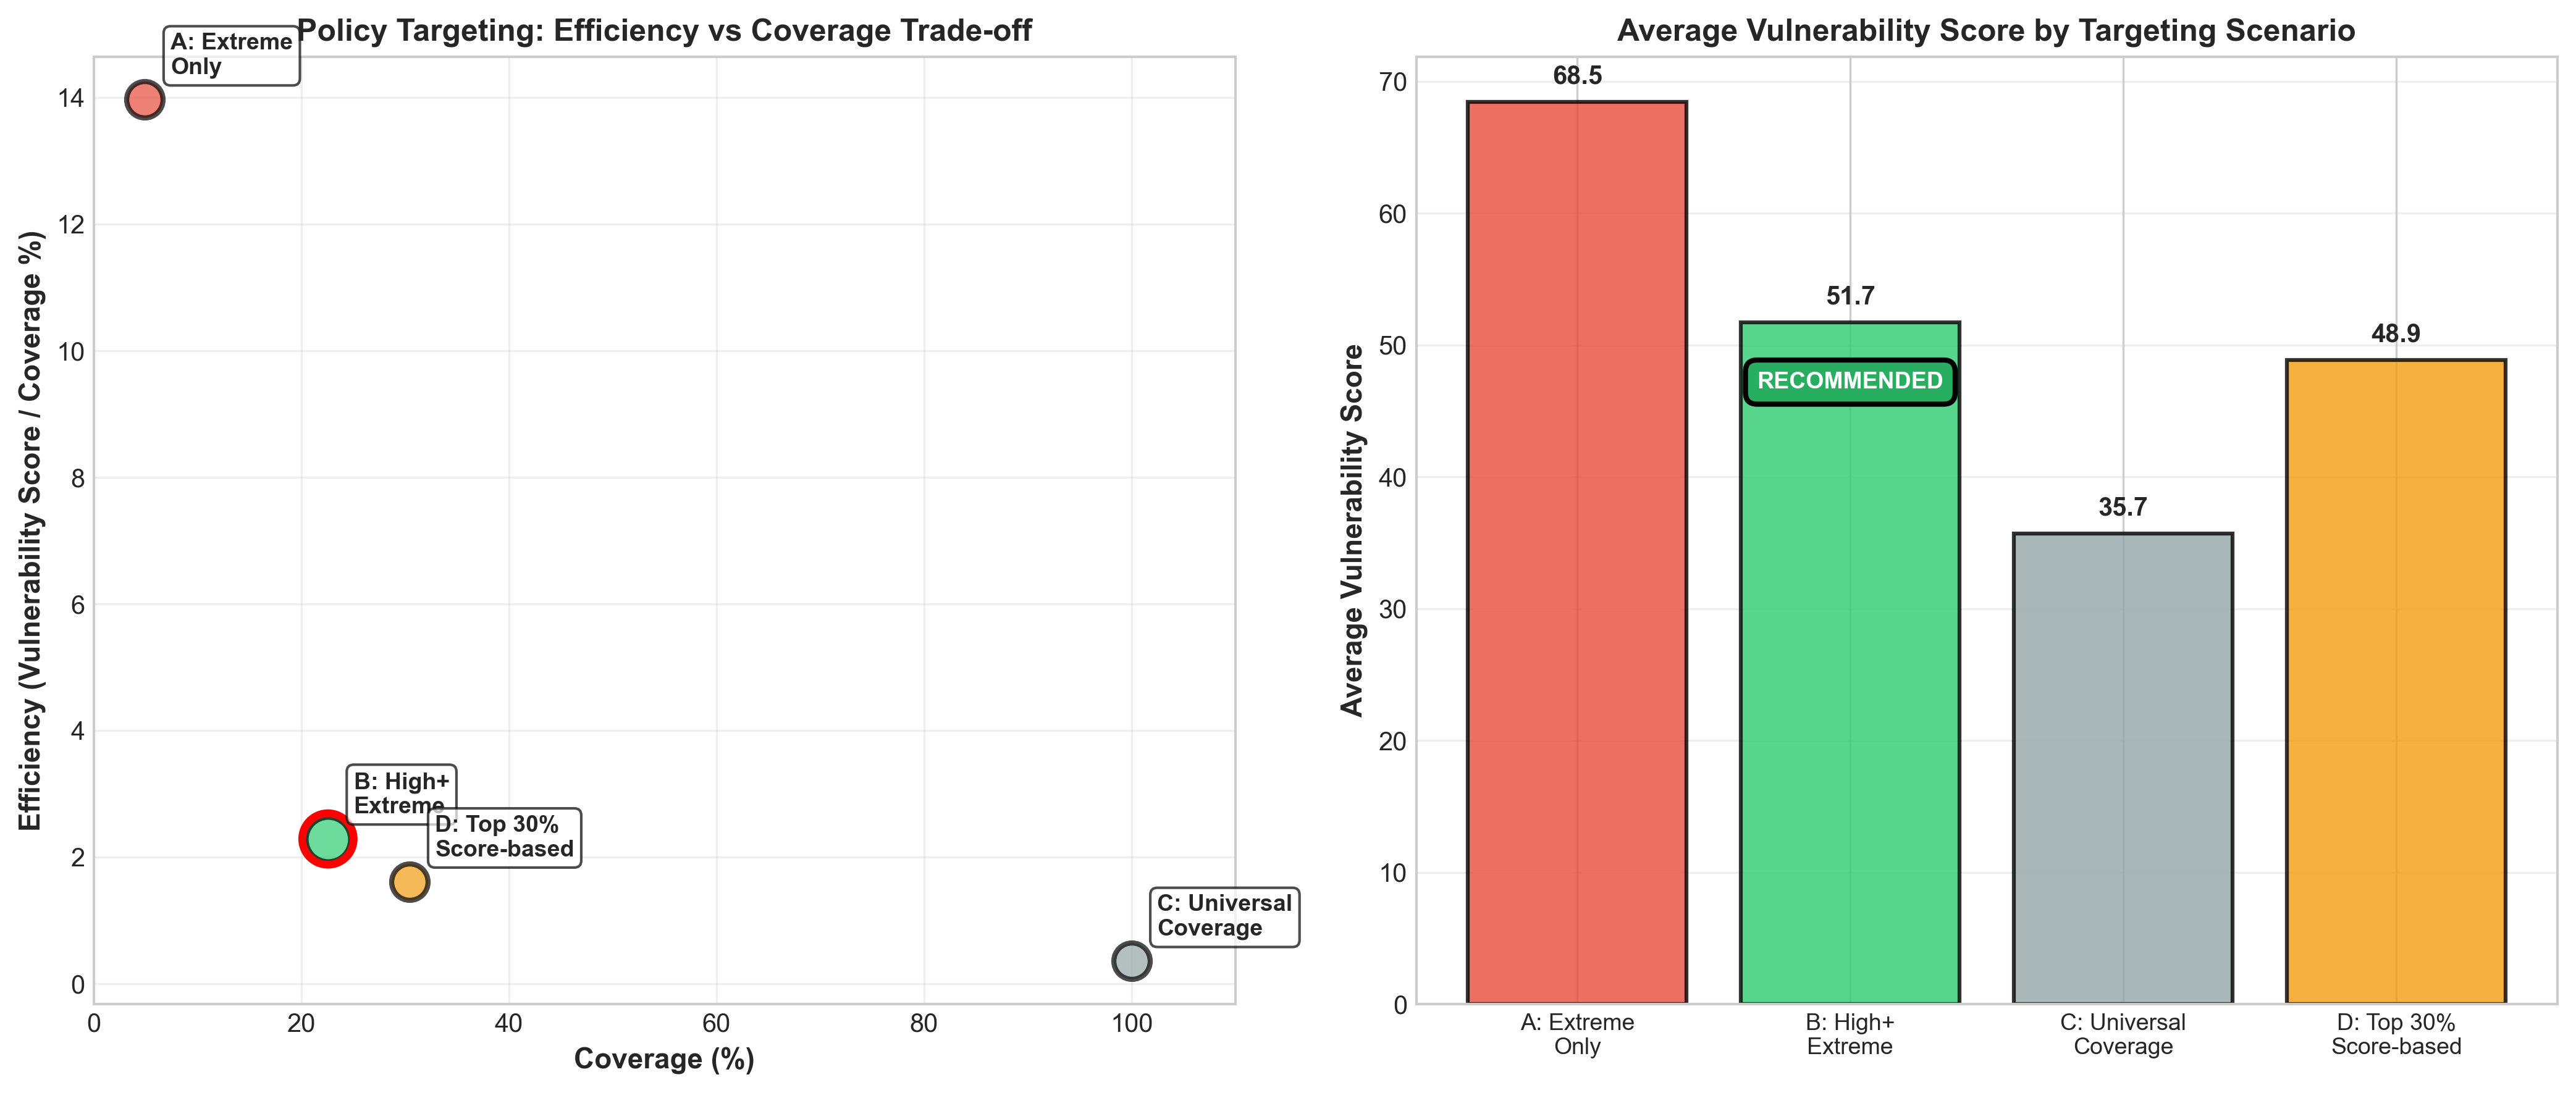

In [6]:
# Cell 6: Figure 4 - Policy Targeting Scenarios
print("=" * 80)
print("FIGURE 4: POLICY TARGETING SCENARIOS COMPARISON")
print("=" * 80)

# Prepare data
scenarios = policy_scenarios.copy()
scenario_labels = ['A: Extreme\nOnly', 'B: High+\nExtreme', 'C: Universal\nCoverage', 'D: Top 30%\nScore-based']

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Efficiency vs Coverage (Scatter)
colors_map = ['#e74c3c', '#2ecc71', '#95a5a6', '#f39c12']  # Red, Green (recommended), Gray, Orange
sizes = [200, 300, 200, 200]  # Larger for recommended

for i, row in scenarios.iterrows():
    axes[0].scatter(row['Coverage (%)'], row['Efficiency'], 
                   s=sizes[i], c=colors_map[i], alpha=0.7, 
                   edgecolors='black', linewidth=2, label=scenario_labels[i])
    
    # Add labels
    axes[0].annotate(scenario_labels[i], 
                    (row['Coverage (%)'], row['Efficiency']),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

# Add recommended marker
rec_row = scenarios.iloc[1]  # Scenario B
axes[0].scatter(rec_row['Coverage (%)'], rec_row['Efficiency'], 
               s=400, facecolors='none', edgecolors='red', linewidth=3, 
               marker='o', label='RECOMMENDED')

axes[0].set_xlabel('Coverage (%)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Efficiency (Vulnerability Score / Coverage %)', fontweight='bold', fontsize=11)
axes[0].set_title('Policy Targeting: Efficiency vs Coverage Trade-off', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim([0, 110])

# Plot 2: Average Vulnerability Score by Scenario (Bar)
bars = axes[1].bar(range(len(scenarios)), scenarios['Avg Vuln Score'], 
                   color=colors_map, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, scenarios['Avg Vuln Score'])):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{val:.1f}', ha='center', va='bottom', 
                fontsize=10, fontweight='bold')

# Add recommended marker
axes[1].text(1, scenarios.iloc[1]['Avg Vuln Score'] - 5, 'RECOMMENDED', 
            ha='center', fontsize=9, fontweight='bold', color='white',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#27ae60', edgecolor='black', linewidth=2))

axes[1].set_xticks(range(len(scenarios)))
axes[1].set_xticklabels(scenario_labels, fontsize=9)
axes[1].set_ylabel('Average Vulnerability Score', fontweight='bold', fontsize=11)
axes[1].set_title('Average Vulnerability Score by Targeting Scenario', fontweight='bold', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/figure4_policy_targeting_scenarios.png', dpi=300, bbox_inches='tight')
print("\nFigure 4 saved: results/figures/figure4_policy_targeting_scenarios.png")
print("Key insights:")
print(f"  - Scenario B (Recommended): {scenarios.iloc[1]['Coverage (%)']:.1f}% coverage, efficiency={scenarios.iloc[1]['Efficiency']:.2f}")
print(f"  - Balances targeting accuracy with program reach")
print(f"  - Covers all high-volatility segments (Clusters 1+2)")
print(f"  - Average vulnerability score: {scenarios.iloc[1]['Avg Vuln Score']:.1f}")
plt.show()

## Summary: All Figures Generated

In [7]:
# Cell 7: Summary
print("=" * 80)
print("VISUALIZATION GENERATION COMPLETE")
print("=" * 80)

print("\nFIGURES GENERATED (300 DPI, Publication-Ready):")
print("  1. figure1_cluster_temporal_profiles.png")
print("     - Cluster CV consumption and food ratio trends (2013-2025)")
print("     - Shows temporal stability and consumption patterns")
print("")
print("  2. figure2_feature_importance_shap.png")
print("     - Top 10 SHAP feature importance rankings")
print("     - Highlights CV consumption dominance (23.26%)")
print("")
print("  3. figure3_classification_performance.png")
print("     - RF vs XGBoost performance comparison")
print("     - Shows accuracy and stability (RF: 98.05% ± 2.67%)")
print("")
print("  4. figure4_policy_targeting_scenarios.png")
print("     - Policy targeting efficiency vs coverage trade-off")
print("     - Recommends Scenario B (23% coverage)")
print("")
print("=" * 80)
print("ALL FIGURES READY FOR PAPER INSERTION")
print("=" * 80)
print("\nUsage in LaTeX:")
print("  \\begin{figure}[h]")
print("    \\centering")
print("    \\includegraphics[width=0.9\\textwidth]{figures/figure1_cluster_temporal_profiles.png}")
print("    \\caption{Cluster consumption volatility and food ratio trends (2013-2025)}")
print("    \\label{fig:temporal_profiles}")
print("  \\end{figure}")
print("\nNext steps:")
print("  1. Insert figures into manuscript Results section")
print("  2. Reference figures in text (e.g., 'as shown in Figure 1...')")
print("  3. Add detailed captions explaining key patterns")
print("  4. Review figure quality in compiled PDF")

VISUALIZATION GENERATION COMPLETE

FIGURES GENERATED (300 DPI, Publication-Ready):
  1. figure1_cluster_temporal_profiles.png
     - Cluster CV consumption and food ratio trends (2013-2025)
     - Shows temporal stability and consumption patterns

  2. figure2_feature_importance_shap.png
     - Top 10 SHAP feature importance rankings
     - Highlights CV consumption dominance (23.26%)

  3. figure3_classification_performance.png
     - RF vs XGBoost performance comparison
     - Shows accuracy and stability (RF: 98.05% ± 2.67%)

  4. figure4_policy_targeting_scenarios.png
     - Policy targeting efficiency vs coverage trade-off
     - Recommends Scenario B (23% coverage)

ALL FIGURES READY FOR PAPER INSERTION

Usage in LaTeX:
  \begin{figure}[h]
    \centering
    \includegraphics[width=0.9\textwidth]{figures/figure1_cluster_temporal_profiles.png}
    \caption{Cluster consumption volatility and food ratio trends (2013-2025)}
    \label{fig:temporal_profiles}
  \end{figure}

Next steps: